# <center> Examination of State Drug Recalls #
<center>By: Louis Farer</center>
<center>CHIP 490-335 Introduction to Programming</center>
<center>Professor Alex Harding </center>

*<center>Disclaimer: This is an academic exercise based on real data and no decisions should be made based off of this analysis.* </center>

## Introduction:
Drug recalls are critical events that highlight the intersection of public health, regulatory oversight, and pharmaceutical manufacturing. These recalls ensure that defective or potentially harmful medications are swiftly removed from the market to protect patients. By analyzing drug recall data by state, this project provides valuable insights into trends such as the classification of recalled drugs, distribution patterns, common reasons for recalls, the typical length of recall periods, routes of administration affected, and the manufacturers involved. This information can enhance understanding of recall dynamics and support efforts to improve drug safety and regulatory practices. 


## ReadMe:
Below, use the dropdown to select a state. After selecting the state, run and execute the **second cell** and below to have updated information for the new state.

In [4]:
import ipywidgets as widgets
import recall_data
from IPython.display import display
import matplotlib.pyplot as plt


# code for the dropdown was created with the help of ChatGPT

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",  "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=states,
    description='State:',
    value='NC',  # Default selection
)

# Define a function to capture the selected state
selected_state = dropdown.value

def on_state_change(change):
    global selected_state
    selected_state = change['new']
    print(f"Selected state: {selected_state}")

# Attach the handler to the dropdown widget
dropdown.observe(on_state_change, names='value')

# Display the dropdown
display(dropdown)

Dropdown(description='State:', index=32, options=('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', …

## Companies with the Most Recalls

Consumers may be interested in knowing which manufacturers have the most recalls such that they can avoid taking medications from those companies. Below, is a table that lists the ten drug manufacturers with the most recalls and the amount of recalls they had.

In [5]:
from rich.console import Console
from rich.table import Table
from rich.box import HORIZONTALS

date, df = recall_data.main(selected_state)

table = Table(title = f"Top 10 Companies with the Most Recalls in {selected_state} as of {date}", box=HORIZONTALS)
table.add_column("Manufacturer Name")
table.add_column("Number of Recalls")

#the code for getting the data to put into the table was written with the help of ChatGPT

top_5_recalls = df["Manufacturer"].value_counts().head(10)
for value, count in top_5_recalls.items():
    table.add_row(str(value), str(count))

console = Console()
console.print(table)

Top 10 Companies with the Most Recalls in NC as of 2024-12-04
 ─────────────────────────────────────────────────────────── 
  Manufacturer Name                       Number of Recalls  
 ─────────────────────────────────────────────────────────── 
  King Bio Inc.                           465                
  Accord Healthcare, Inc.                 76                 
  Health Innovations Pharmacy, Inc        65                 
  Natures Pharmacy & Compounding Center   48                 
  CMC Enterprise Pharmacy                 32                 
  Mckesson Packaging Services             14                 
  Family Pharmacy of Statesville          12                 
  GlaxoSmithKline, LLC.                   10                 
  Exela Pharma Sciences LLC               10                 
  GlaxoSmithKline, LLC                    7                  
 ───────────────────────────────────────────────────────────

## Recall Information

Below are graphs that indicate the classification of recalled drugs, the current status of the recall, the distribution pattern, the most common reasons for recall, the most common admistered route of the recalled medications, and the percent of companies that voluntary performed the recall. 

### Status

This chart shows the distribution of drug recalls that have been completed, terminated, or are ongoing. Most of the recalls have been terminated, but the 

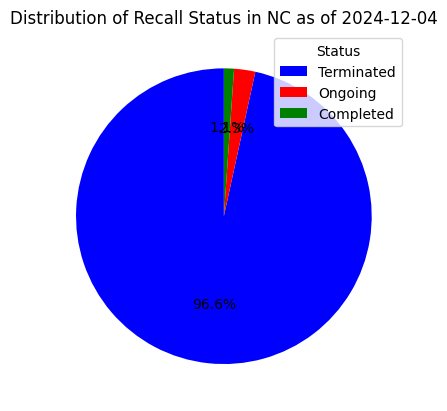

In [6]:
data = df["Status"].value_counts()
colors = ["blue", "red", "green"]
plt.pie(data, startangle=90, colors=colors, autopct='%1.1f%%')
plt.title(f"Distribution of Recall Status in {selected_state} as of {date}")
plt.legend(data.index, title="Status", loc="best")
plt.show()


### Classification of Drug

This chart shows the distribution of of the classification of recalled drugs. Although the amount varies by state, most states have overwhelmingly high amounts of recalls on Class II drugs compared to Class I and Class III.

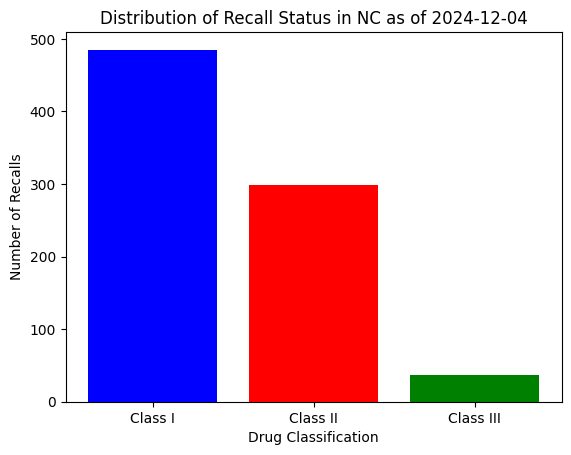

In [7]:
data = df["Classification"].value_counts()

colors = ["blue", "red", "green"]
plt.bar(data.index, data.values, color=colors)
plt.title(f"Distribution of Recall Status in {selected_state} as of {date}")
plt.xlabel("Drug Classification")
plt.ylabel("Number of Recalls")
plt.show()

### Reasons For Recall

Below is a table that lists the top ten most common reasons for why a medication is recalled. Note that in some states, there are repeated reasons as some labels have more specific information, such as an added explanation for the lack of sterility. They are counted separately due to the varying specificity of the information.

In [8]:
table = Table(title = f"Top 10 Reasons for Recalls in {selected_state} as of {date}", box=HORIZONTALS)
table.add_column("Reason")
table.add_column("Number of Recalls")

top_10_recalls = df["Reason for Recall"].value_counts().head(10)
for value, count in top_10_recalls.items():
    table.add_row(str(value), str(count))

console = Console()
console.print(table)

                                 Top 10 Reasons for Recalls in NC as of 2024-12-04                                 
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  Reason                                                                                        Number of Recalls  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  Microbial contamination                                                                       465                
  CGMP Deviations: recalling drug products following an FDA inspection.                         67                 
  Lack of Assurance of Sterility and Stability Data does not Support Expiry: recent             65                 
  inspection observations associated with certain quality control procedures that present a                        
  risk to sterility and quality assurance.                                                                         
  Lack of Sterility Assurance: All lots of sterile products compounded by the pharmacy that     48                 
  are not expired due to concerns associated with quality control procedures that present a                        
  potential risk to sterility assurance that were observed during a recent FDA inspection.                         
  Lack of sterility assurance.                                                                  32                 
  Lack of Assurance of Sterility                                                                13                 
  CGMP Deviations: Potential Glass and Silicone particulates in product                         5                  
  Lack of Assurance of Sterility; All lots of sterile products compounded by the pharmacy       5                  
  within expiry are subject to this recall. This recall is initiated due to concerns                               
  associated with quality control procedures observed during a recent FDA inspection.                              
  Penicillin Cross Contamination                                                                4                  
  Penicillin Cross Contamination and Presence of Foreign Substance.  Product was contaminated   4                  
  with penicillin and foreign substances during manufacturing process.                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

### Voluntary Action

Below is a pie chart that indicates the percent of recalls that were voluntarily performed by the company versus the percent of recalls that were forced on the company by the FDA. Manufacturers overwhelmingly initiate the recalls voluntarily.

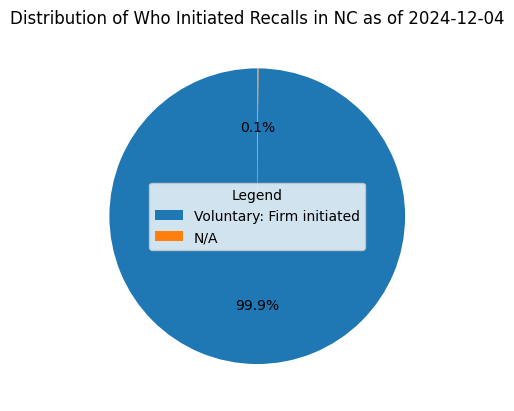

In [9]:
data = df["Voluntary Mandated"].value_counts()
plt.pie(data, startangle=90, autopct='%1.1f%%')
plt.title(f"Distribution of Who Initiated Recalls in {selected_state} as of {date}")
plt.legend(data.index, title="Legend", loc="best")
plt.show()

### Distribution Pattern

The table below lists the top five most common distribution patterns of recalls. Many recalls span the country internationally, while some are specific to areas of the US or US hospitals.

In [10]:
table = Table(title = f"Top 5 Distribution Patterns for Recalls in {selected_state} as of {date}", box=HORIZONTALS)
table.add_column("Distribution Pattern")
table.add_column("Number of Recalls")

top_5_recalls = df["Distribution Pattern"].value_counts().head(5)
for value, count in top_5_recalls.items():
    table.add_row(str(value), str(count))

console = Console()
console.print(table)

    Top 5 Distribution Patterns for Recalls in NC as of 2024-12-04    
 ──────────────────────────────────────────────────────────────────── 
  Distribution Pattern                             Number of Recalls  
 ──────────────────────────────────────────────────────────────────── 
  U.S.A. Nationwide, Canada, and Australia.        465                
  NC                                               154                
  United States including Puerto Rico and Canada   67                 
  Nationwide                                       24                 
  Nationwide within the United States              13                 
 ────────────────────────────────────────────────────────────────────

### Recall Route

Below is a bar chart that shows how patients take the recalled medications. Many recalls do not list the administration route for the medication as seen by the large amount of N/A reports. Of those recalled, oral medications are the most common type across states.

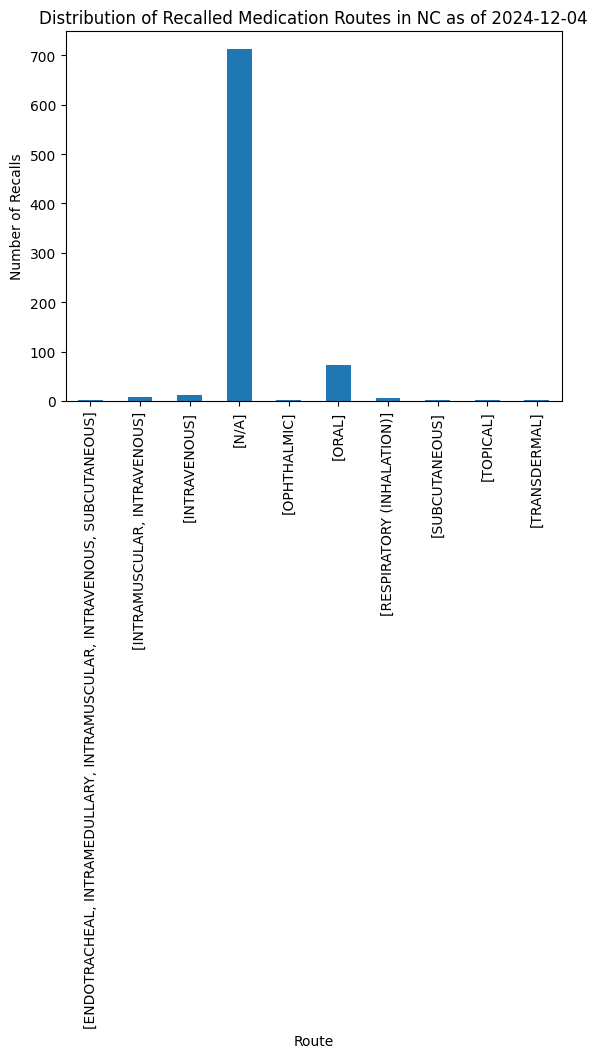

In [11]:
data = df["Route"].value_counts().sort_index()
plt.title(f"Distribution of Recalled Medication Routes in {selected_state} as of {date}")
plt.xlabel("Route")
plt.ylabel("Number of Recalls")
data.plot(kind="bar")
plt.show()